In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.chdir("/content/gdrive/My Drive/NLP Project")
!ls

AuthorIdentify.ipynb  NaiveBayes.ipynb	test.csv   Untitled
mlp_model_weights.h5  NLPproject.ipynb	train.csv


In [0]:
import pandas as pd
import numpy as np
author_data = pd.read_csv('train.csv')

y = np.array(author_data['author'])
y_train = []
for i in y:
  if "EAP" == i:
    y_train.append(0)
  if "HPL" == i:
    y_train.append(1)
  if "MWS" == i:
    y_train.append(2)
y_trains= np.array(y_train)


In [4]:
print(y_trains[:10])
author_data.head(10)

[0 1 0 2 1 2 0 0 0 2]


,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(author_data['text'],y_trains,random_state=0)
 
X_test[:2]



16527    There seemed to be a void, and nothing more, a...
6398     This event caused many of those who were about...
Name: text, dtype: object

In [7]:

vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train_vectorized.toarray(), y_train) 
gnb_predictions = gnb.predict(vect.transform(X_test).toarray()) 

# accuracy on X_test 
accuracy = gnb.score(vect.transform(X_test).toarray(), y_test) 
print (accuracy)

from sklearn.metrics import confusion_matrix
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 


0.7052093973442288


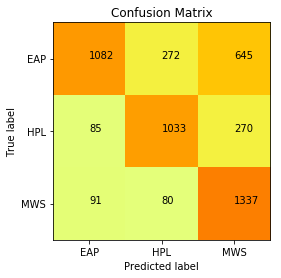

In [21]:
import matplotlib.pyplot as plt

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
classNames = ['EAP','HPL','MWS']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)

for i in range(3):
    for j in range(3):
        plt.text(j,i, str(cm[i][j]))
plt.show()

In [0]:
bow_transformer=CountVectorizer().fit(X_train)
text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA
text_bow_test=bow_transformer.transform(X_test)#TEST DATA

In [0]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [27]:
train_acc = model.score(text_bow_train, y_train)
print("Train :")
print(train_acc)

Train :
0.9143966221737946


In [29]:
print("Test :")
model.score(text_bow_test, y_test)

Test :


0.8402451481103167

In [30]:
from sklearn.metrics import confusion_matrix
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 
cm

array([[1082,  272,  645],
       [  85, 1033,  270],
       [  91,   80, 1337]])

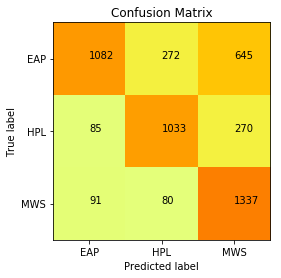

In [31]:
import matplotlib.pyplot as plt

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
classNames = ['EAP','HPL','MWS']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)

for i in range(3):
    for j in range(3):
        plt.text(j,i, str(cm[i][j]))
plt.show()